In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sea_level= pd.read_csv(r'C:\Users\there\Desktop\DataAnalysis_Course\DataForDataAnalysis\epa-sea-level.csv')

In [3]:
sea_level.head()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN
3,1883,-0.232283,-1.129921,0.665354,NaN
4,1884,0.590551,-0.283465,1.464567,NaN


In [4]:
sea_level.tail()

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
129,2009,8.586614,8.311024,8.862205,8.046354
130,2010,8.901575,8.618110,9.185039,8.122973
131,2011,8.964567,8.661417,9.267717,8.053065
132,2012,9.326772,8.992126,9.661417,8.457058
133,2013,8.980315,8.622047,9.338583,8.546648


In [5]:
sea_level.shape

(134, 5)

In [6]:
sea_level.drop(['NOAA Adjusted Sea Level', 'Lower Error Bound', 'Upper Error Bound'], axis=1, inplace=True)

In [7]:
sea_level.head()

,Year,CSIRO Adjusted Sea Level
0,1880,0.000000
1,1881,0.220472
2,1882,-0.440945
3,1883,-0.232283
4,1884,0.590551


In [8]:
sea_level.isnull().sum()

Year                        0
CSIRO Adjusted Sea Level    0
dtype: int64

In [9]:
sea_level.isna().any()

Year                        False
CSIRO Adjusted Sea Level    False
dtype: bool

In [10]:
sea_level.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Year                      134 non-null    int64  
 1   CSIRO Adjusted Sea Level  134 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.2 KB


In [11]:
sea_level.describe()

,Year,CSIRO Adjusted Sea Level
count,134.000000,134.000000
mean,1946.500000,3.650341
std,38.826537,2.485692
min,1880.000000,-0.440945
25%,1913.250000,1.632874
50%,1946.500000,3.312992
75%,1979.750000,5.587598
max,2013.000000,9.326772


In [12]:
print(len(sea_level))

134


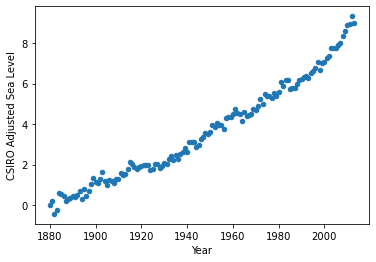

In [13]:
sea_level.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level')
plt.show()

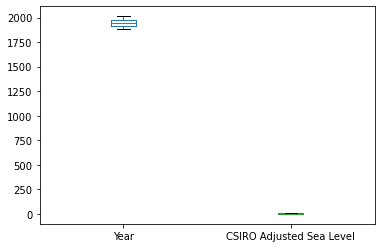

In [14]:
sea_level.plot(kind='box')
plt.show()

In [15]:
sea_level.corr() # correalation coefficient

,Year,CSIRO Adjusted Sea Level
Year,1.000000,0.984757
CSIRO Adjusted Sea Level,0.984757,1.000000


In [16]:
# Change to dataframe variables
year1=pd.DataFrame(sea_level['Year'])
sea_level1=pd.DataFrame(sea_level['CSIRO Adjusted Sea Level'])

In [17]:
year1

,Year
0,1880
1,1881
2,1882
3,1883
4,1884
...,...
129,2009
130,2010
131,2011
132,2012


In [18]:
from sklearn import linear_model

In [19]:
# Build Linear Regression model
lm = linear_model.LinearRegression()
model=lm.fit(year1, sea_level1)

In [20]:
model.coef_

array([[0.06304458]])

In [21]:
model.intercept_

array([-119.06594197])

In [22]:
model.score(year1, sea_level1) # Evaluate the model

0.9697466074149553

In [23]:
# Predict new sea level
year_new = np.array([2050]).reshape(-1,1)
sea_level_predict=model.predict(year_new)
sea_level_predict

array([[10.17545526]])

In [24]:
# Predict more values
X=np.array([2000, 2010,2015,2020,2025,2030,2040,2045,2050,2055])
X=pd.DataFrame(X)
Y=model.predict(X)
Y=pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys=['year_new1','sea_level_predicted'])
df

,year_new1,sea_level_predicted
,0,0
0,2000,7.023226
1,2010,7.653672
2,2015,7.968895
3,2020,8.284118
4,2025,8.599341
5,2030,8.914564
6,2040,9.545009
7,2045,9.860232
8,2050,10.175455


In [25]:
a=X.values
a

array([[2000],
       [2010],
       [2015],
       [2020],
       [2025],
       [2030],
       [2040],
       [2045],
       [2050],
       [2055]])

In [26]:
b=Y.values
b

array([[ 7.02322606],
       [ 7.6536719 ],
       [ 7.96889482],
       [ 8.28411774],
       [ 8.59934066],
       [ 8.91456358],
       [ 9.54500942],
       [ 9.86023234],
       [10.17545526],
       [10.49067818]])

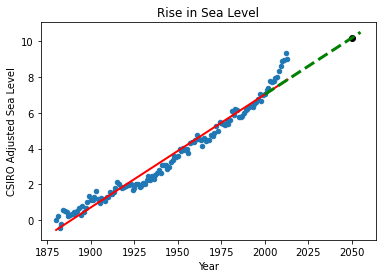

In [27]:
# Visualize the result
sea_level.plot(kind='scatter', x='Year', y='CSIRO Adjusted Sea Level')
# Plotting the Regression Line
plt.plot(year1,model.predict(year1),color='red', linewidth=2)
# Plotting the predicted value
plt.scatter(year_new, sea_level_predict, color='black')
plt.plot(a, b, 'g--', linewidth =3)
plt.title("Rise in Sea Level")
plt.show()
